In [12]:
# import libraries
import urllib
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np


In [14]:
# url input function
# this is the url for simplicity : https://raw.githubusercontent.com/onaio/ona-tech/master/data/water_points.json
url = input("Enter the data URL: ")
print('Data URL =',url)

# Storing the data
response = urlopen(url)


# storing the JSON response 
# from url in data
data_json = json.loads(response.read())

#create a pandas dataframe
df = pd.DataFrame (data_json)
df.head(5)
df.shape
# create a dataframe with only the necessary columns 


Enter the data URL: https://raw.githubusercontent.com/onaio/ona-tech/master/data/water_points.json
Data URL = https://raw.githubusercontent.com/onaio/ona-tech/master/data/water_points.json


(712, 48)

In [15]:
#checking df information whether there are empty columns and also the datatypes available in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   water_pay                    712 non-null    object
 1   respondent                   712 non-null    object
 2   research_asst_name           712 non-null    object
 3   water_used_season            712 non-null    object
 4   _bamboo_dataset_id           712 non-null    object
 5   _deleted_at                  0 non-null      object
 6   water_point_condition        712 non-null    object
 7   _xform_id_string             712 non-null    object
 8   other_point_1km              712 non-null    object
 9   _attachments                 712 non-null    object
 10  communities_villages         712 non-null    object
 11  end                          712 non-null    object
 12  animal_number                528 non-null    object
 13  water_point_id               712 no

In [16]:
#selecting a subset from the dataframe (df) where we only need column 10, column 26
relevant_columns = df[['communities_villages', 'water_functioning']]
#create a new dataframe for the data subsets i.e only the relevant columns
#now we are only going to work with this dataframe, we called it relevant_columnsDF
relevant_columnsDf= pd.DataFrame (relevant_columns)
#Converting the unordered categorical 'Water functioning' , 
#converted the (if functioning is 'yes' replaced it with '1' and if if functioning is 'no' replaced it with '0')
#this is to further check for any data disparencies

relevant_columnsDf.water_functioning =relevant_columnsDf.water_functioning.map({'yes':'1','no':'0'})

relevant_columnsDf


,communities_villages,water_functioning
0,Gumaryili,1
1,Selinvoya,1
2,Selinvoya,1
3,Selinvoya,1
4,Selinvoya,1
...,...,...
707,Suik,1
708,Vundema,1
709,Vundema,1
710,Jiniensa,1


In [17]:
#checking if our water_functioning column has any empty or irrelevant /dirty data.
#converting data to categorical helped us identify that there are two elements that are not of type 1 or 0 
relevant_columnsDf['water_functioning' ].value_counts(dropna=False )


1      623
0       87
NaN      2
Name: water_functioning, dtype: int64

In [18]:
# if water functioning contains a value which is neither 'yes' nor 'no' it eliminates it.
#we eliminated the NAN 
relevant_columnsDf.dropna(subset = ["water_functioning"], inplace=True)


In [19]:
#clean data
relevant_columnsDf['water_functioning' ].value_counts(dropna=False )

1    623
0     87
Name: water_functioning, dtype: int64

In [ ]:
relevant_columnsDf['communities_villages' ].value_counts(dropna=False )

Kpatarigu    51
Jagsa        38
Nayoku       35
Guuta        32
Nabulugu     31
             ..
Kalaasa       1
Gumaryili     1
Garigu        1
Jiniensa      1
Suik          1
Name: communities_villages, Length: 65, dtype: int64

In [ ]:
relevant_columnsDf.shape

(710, 2)

In [ ]:
relevant_columnsDf.head(5)

,communities_villages,water_functioning
0,Gumaryili,1
1,Selinvoya,1
2,Selinvoya,1
3,Selinvoya,1
4,Selinvoya,1


In [ ]:
relevant_columnsDf.info

<bound method DataFrame.info of     communities_villages water_functioning
0              Gumaryili                 1
1              Selinvoya                 1
2              Selinvoya                 1
3              Selinvoya                 1
4              Selinvoya                 1
..                   ...               ...
707                 Suik                 1
708              Vundema                 1
709              Vundema                 1
710             Jiniensa                 1
711                Jagsa                 1

[710 rows x 2 columns]>

In [ ]:
#checking if the columns are empty or not.
relevant_columnsDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 711
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   communities_villages  710 non-null    object
 1   water_functioning     710 non-null    object
dtypes: object(2)
memory usage: 16.6+ KB


In [ ]:
#checking for specific information from this two columns 
#relevant_columnsDf['water_functioning']

In [ ]:
relevant_columnsDf['communities_villages']

0      Gumaryili
1      Selinvoya
2      Selinvoya
3      Selinvoya
4      Selinvoya
         ...    
707         Suik
708      Vundema
709      Vundema
710     Jiniensa
711        Jagsa
Name: communities_villages, Length: 710, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


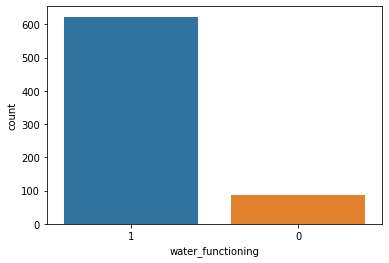

In [ ]:
#visualize the waterpoints which are working and those which are not working.
import seaborn as sns
sns.countplot(relevant_columnsDf['water_functioning'])

In [ ]:
#the output of this cell could further help us deduce that there are 65 communities_villages
relevant_columnsDf['communities_villages' ].value_counts(dropna=False )

Kpatarigu    51
Jagsa        38
Nayoku       35
Guuta        32
Nabulugu     31
             ..
Kalaasa       1
Gumaryili     1
Garigu        1
Jiniensa      1
Suik          1
Name: communities_villages, Length: 65, dtype: int64

In [20]:
#Checking for the total functioning and unfuctioning data points where 1 is yes and 0 is no
#the output shows that there are 623 working points and 87 points which are not working.
relevant_columnsDf['water_functioning' ].value_counts(dropna=False )

1    623
0     87
Name: water_functioning, dtype: int64

In [21]:
#look at all the values in each column and get a count using (for val which loops through the entire dataframe)
#the number of occurences per village whichmeans the number of water points per village either functional or unfunctional.
#the number of either fuctioning or unfuctioning water points 
for val in relevant_columnsDf:
    print(relevant_columnsDf[val].value_counts())
print()

Kpatarigu    51
Jagsa        38
Nayoku       35
Guuta        32
Nabulugu     31
             ..
Garigu        1
Gumaryili     1
Kalaasa       1
Suik          1
Jiniensa      1
Name: communities_villages, Length: 65, dtype: int64
1    623
0     87
Name: water_functioning, dtype: int64



In [22]:
#this is another approach with the same answers.
relevant_columnsDf['communities_villages' ].value_counts(dropna=False )

Kpatarigu    51
Jagsa        38
Nayoku       35
Guuta        32
Nabulugu     31
             ..
Garigu        1
Gumaryili     1
Kalaasa       1
Suik          1
Jiniensa      1
Name: communities_villages, Length: 65, dtype: int64

In [23]:
relevant_columnsDf.isnull().sum()

communities_villages    0
water_functioning       0
dtype: int64

In [24]:
# selecting rows based on condition , this codes selects all rows with a value zero which represents "no" meaning not fuctional.
#Then stores them in a NotFunctional dataframe.
notFunctionalWaterPointsDf = relevant_columnsDf.loc[relevant_columnsDf['water_functioning'] == '0'] 
    
print('\nResult dataframe for water points that are not functioning :\n', 
  notFunctionalWaterPointsDf    )



Result dataframe for water points that are not functioning :
     communities_villages water_functioning
8              Selinvoya                 0
15              Nabulugu                 0
31              Nabulugu                 0
34              Nabulugu                 0
37              Nabulugu                 0
..                   ...               ...
627                Jagsa                 0
633                Jagsa                 0
646                Jagsa                 0
648                Jagsa                 0
649                Jagsa                 0

[87 rows x 2 columns]


In [25]:
 notFunctionalWaterPointsDf

,communities_villages,water_functioning
8,Selinvoya,0
15,Nabulugu,0
31,Nabulugu,0
34,Nabulugu,0
37,Nabulugu,0
...,...,...
627,Jagsa,0
633,Jagsa,0
646,Jagsa,0
648,Jagsa,0


In [31]:
percentagesDf= notFunctionalWaterPointsDf['communities_villages'].value_counts(normalize=True)*100
print ('percentage of broken water points in rank from highest to lowest is : \n' ,  percentagesDf)



percentage of broken water points in rank from highest to lowest is : 
 Arigu          6.896552
Nayoku         6.896552
Tantala        6.896552
Jagsa          6.896552
Kpatarigu      5.747126
Kubore         5.747126
Namgurima      4.597701
Nabulugu       4.597701
Loagri_1_      4.597701
Zanwara        4.597701
Zukpeni        4.597701
Zua            4.597701
Kurugu         4.597701
Banyangsa      3.448276
Gbaarigu       3.448276
Bandem         3.448276
Longsa         2.298851
Zangu-Vuga     2.298851
Soo            2.298851
Guuta          2.298851
Chanpolinsa    1.149425
Alavanyo       1.149425
Zogsa          1.149425
Gbima          1.149425
Kulbugu        1.149425
Kanwaasa       1.149425
Dorinsa        1.149425
Selinvoya      1.149425
Name: communities_villages, dtype: float64
